Read and analyse
================

In [2]:
from IPython.display import display, HTML

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure plots are shown inside the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [58]:
def display_full(x):
  pd.set_option('display.max_rows', len(x))
  pd.set_option('display.max_columns', x.shape[1])
  display(x)
  pd.reset_option('display.max_rows')
  pd.reset_option('display.max_columns')

In [27]:
import warnings
def describe_no_warn(x):
  warnings.filterwarnings('ignore')
  result = raw_train_data.describe()
  warnings.filterwarnings('default')
  return result

In [4]:
raw_train_data = pd.read_csv('../ads.csv')

In [5]:
ms_columns = ["MSELC", "MSELR", "MSELT", "MSFMR", "MSFMT",
              "MSGMR", "MSGMT", "MSNVDQ", "MSRLR", "MSRLT", "MSVDQ", "MSVRR", "MSVRT"]
wasi_columns = ["WASIFIQ", "WASIMT", "WASIVT", "WPPSMR", "WPPSVR", "WPPSFSIQ", "WASIPIQ", "WASIVIQ"]
y_columns = ms_columns + wasi_columns

In [6]:
raw_train_data.head()

,STUDYID,SUBJID,SEXN,SEX,STRATUM,FEEDINGN,FEEDING,DURBRST,GAGEBRTH,BIRTHWT,...,MSVRR,MSVRT,WASIFIQ,WASIMT,WASIVT,WPPSMR,WPPSVR,WPPSFSIQ,WASIPIQ,WASIVIQ
0,1,1001,1,Male,1,NaN,NaN,NaN,259,3752.0,...,29.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1001,1,Male,1,NaN,NaN,NaN,259,3752.0,...,45.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1002,1,Male,1,3.0,Mixture breast/formula fed,60.0,282,3640.0,...,6.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1002,1,Male,1,3.0,Mixture breast/formula fed,60.0,282,3640.0,...,15.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1004,1,Male,1,10.0,Breast feeding,480.0,294,2688.0,...,NaN,NaN,129.0,72.0,62.0,72.0,62.0,NaN,NaN,NaN


In [7]:
raw_train_data.dtypes

STUDYID         int64
SUBJID          int64
SEXN            int64
SEX            object
STRATUM         int64
FEEDINGN      float64
FEEDING        object
DURBRST       float64
GAGEBRTH        int64
BIRTHWT       float64
BIRTHLEN      float64
MMARITN       float64
MMARIT         object
HOLLINGS      float64
NCHLD         float64
PARITY        float64
GAGEDAYS        int64
AGEDAYS         int64
WTKG          float64
HTCM          float64
BMI           float64
HCIRCM        float64
HCIRMRI       float64
WAZ           float64
HAZ           float64
WHZ           float64
BAZ           float64
HCAZ          float64
HCMRIAZ       float64
L_MWFBCC      float64
               ...   
R_MWFFRNTL    float64
R_MWFICAPS    float64
R_MWFOCCPT    float64
R_MWFORAD     float64
R_MWFPARTL    float64
R_MWFSLFAS    float64
R_MWFTMPRL    float64
HCT           float64
FERRITIN      float64
MSELC         float64
MSELR         float64
MSELT         float64
MSFMR         float64
MSFMT         float64
MSGMR     

In [28]:
describe_no_warn(raw_train_data)

,STUDYID,SUBJID,SEXN,STRATUM,FEEDINGN,DURBRST,GAGEBRTH,BIRTHWT,BIRTHLEN,MMARITN,...,MSVRR,MSVRT,WASIFIQ,WASIMT,WASIVT,WPPSMR,WPPSVR,WPPSFSIQ,WASIPIQ,WASIVIQ
count,762.0,762.000000,762.000000,762.000000,670.000000,484.000000,762.000000,736.000000,626.000000,571.000000,...,460.000000,631.000000,74.000000,60.000000,60.000000,50.000000,48.000000,44.000000,0.0,0.0
mean,1.0,1275.502625,1.423885,1.517060,7.346269,292.320248,273.072178,3248.418478,50.895635,2.068301,...,25.443478,51.812995,102.459459,50.366667,54.350000,51.280000,44.770833,105.636364,NaN,NaN
std,0.0,303.161928,0.494497,1.030595,3.228161,231.890553,12.432896,555.953797,3.580669,1.880806,...,14.696162,11.808521,20.955392,11.412106,13.096545,31.161227,19.514577,11.531738,NaN,NaN
min,1.0,1001.000000,1.000000,1.000000,3.000000,0.000000,218.000000,0.000000,33.020000,1.000000,...,0.000000,20.000000,53.000000,9.000000,10.000000,1.000000,6.000000,74.000000,NaN,NaN
25%,1.0,1098.000000,1.000000,1.000000,NaN,NaN,268.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.0,1188.500000,1.000000,1.000000,NaN,NaN,274.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.0,1332.000000,2.000000,1.000000,NaN,NaN,280.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.0,2412.000000,2.000000,5.000000,10.000000,930.000000,299.000000,4732.000000,71.120000,6.000000,...,50.000000,80.000000,140.000000,77.000000,80.000000,120.000000,72.000000,128.000000,NaN,NaN


In [9]:
raw_train_data['SUBJID'].value_counts().value_counts()

1    153
2     80
3     61
4     38
5     15
7      3
6      3
Name: SUBJID, dtype: int64

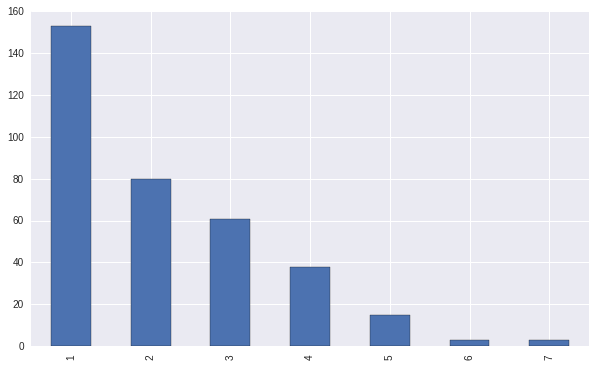

In [10]:
raw_train_data['SUBJID'].value_counts().value_counts().sort_index().plot.bar()

In [33]:
display_full(raw_train_data.corr()[y_columns].sort_index())

,MSELC,MSELR,MSELT,MSFMR,MSFMT,MSGMR,MSGMT,MSNVDQ,MSRLR,MSRLT,MSVDQ,MSVRR,MSVRT,WASIFIQ,WASIMT,WASIVT,WPPSMR,WPPSVR,WPPSFSIQ,WASIPIQ,WASIVIQ
AGEDAYS,0.182879,0.956044,0.138477,0.970231,-0.089887,0.945019,-0.035385,-0.343568,0.954204,0.274499,-0.068914,0.952752,0.172692,0.356704,0.140596,0.392934,0.252589,0.649114,0.221415,NaN,NaN
BAZ,0.011113,0.032624,0.029968,0.044451,0.080624,0.177311,-0.114589,0.008274,0.044621,0.008114,0.001888,0.052111,-0.020781,0.001470,0.285827,-0.065292,-0.319006,-0.461337,-0.145981,NaN,NaN
BIRTHLEN,0.047620,0.030892,0.027877,0.053392,0.043935,0.039342,0.177839,0.097000,0.031408,0.055283,0.083312,0.033892,0.043482,0.201203,0.068192,-0.017641,-0.316259,-0.297904,0.074143,NaN,NaN
BIRTHWT,0.186811,-0.059337,0.111901,-0.046955,0.201395,0.043257,0.193783,0.225630,-0.042037,0.162833,0.186540,-0.046897,0.155555,0.389069,0.139720,0.125367,-0.486301,-0.224769,0.015921,NaN,NaN
BMI,-0.067791,-0.284299,-0.032240,-0.273529,0.074150,-0.107187,-0.116087,0.044662,-0.277804,-0.110135,-0.046012,-0.272615,-0.090308,0.018006,0.198126,0.018255,-0.254118,-0.363253,-0.097020,NaN,NaN
DURBRST,0.104310,0.283186,0.056655,0.288542,0.006188,0.146646,0.004509,-0.059389,0.290628,0.135049,0.047905,0.296102,0.132384,-0.140084,-0.123405,-0.048405,0.054528,0.348932,0.058582,NaN,NaN
FEEDINGN,0.037168,0.115546,0.013027,0.113600,0.004554,0.003749,-0.017408,-0.086799,0.113236,0.049766,-0.014157,0.109861,0.046290,-0.108367,-0.062108,-0.270019,0.127194,0.066006,-0.062591,NaN,NaN
FERRITIN,-0.155097,-0.191098,-0.148336,-0.052115,-0.015418,0.032854,0.029032,0.016002,-0.042573,-0.090558,-0.167609,-0.183798,-0.056319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GAGEBRTH,0.121796,-0.111630,0.058773,-0.100196,0.130403,-0.034834,0.270565,0.268130,-0.117426,0.076033,0.194164,-0.107307,0.131627,0.417592,0.259358,0.054402,-0.509446,-0.137207,-0.082540,NaN,NaN
GAGEDAYS,0.185587,0.955853,0.139911,0.970266,-0.087165,0.945920,-0.023311,-0.338635,0.953942,0.276462,-0.064979,0.952592,0.175731,0.363081,0.144084,0.394194,0.241033,0.644743,0.221388,NaN,NaN


In [59]:
corr = raw_train_data.corr()
dfs = []
for c in y_columns:
  display_full(corr[[c]].sort_values(c, ascending=False).transpose().drop(y_columns, axis=1))

,HOLLINGS,HTCM,BIRTHWT,GAGEDAYS,R_MWFTMPRL,R_MWFFRNTL,AGEDAYS,L_MWFFRNTL,R_MWFCRADT,L_MWFCRADT,L_MWFCNGLM,R_MWFICAPS,WTKG,R_MWFPARTL,R_MWFSLFAS,R_MWFCNGLM,L_MWFICAPS,R_MWFOCCPT,R_MWFORAD,L_MWFTMPRL,L_MWFORAD,L_MWFPARTL,R_MWFCRBLM,L_MWFSLFAS,L_MWFOCCPT,L_MWFGCC,L_MWFCRBLM,SEXN,L_MWFBCC,GAGEBRTH,L_MWFSCC,HAZ,DURBRST,HCIRMRI,WAZ,BIRTHLEN,HCIRCM,FEEDINGN,HCMRIAZ,BAZ,WHZ,HCAZ,PARITY,NCHLD,BMI,STRATUM,SUBJID,FERRITIN,HCT,MMARITN,STUDYID
MSELC,0.246402,0.189035,0.186811,0.185587,0.185459,0.18481,0.182879,0.182729,0.178678,0.177309,0.175874,0.172182,0.171447,0.170559,0.170072,0.169941,0.167574,0.165399,0.165303,0.164731,0.163057,0.161324,0.15942,0.155884,0.152189,0.135977,0.131087,0.124679,0.123456,0.121796,0.113224,0.112387,0.10431,0.102887,0.086959,0.04762,0.03769,0.037168,0.022307,0.011113,-0.01424,-0.014782,-0.045403,-0.059034,-0.067791,-0.130512,-0.154836,-0.155097,-0.158284,-0.204799,NaN


,AGEDAYS,GAGEDAYS,HTCM,WTKG,R_MWFFRNTL,R_MWFCRADT,L_MWFFRNTL,L_MWFGCC,L_MWFCRADT,R_MWFTMPRL,L_MWFCNGLM,L_MWFTMPRL,R_MWFCNGLM,R_MWFPARTL,L_MWFBCC,R_MWFORAD,R_MWFICAPS,L_MWFICAPS,L_MWFORAD,R_MWFSLFAS,R_MWFOCCPT,L_MWFPARTL,L_MWFSLFAS,L_MWFOCCPT,L_MWFSCC,HCIRCM,R_MWFCRBLM,HCIRMRI,L_MWFCRBLM,DURBRST,HOLLINGS,NCHLD,HAZ,FEEDINGN,HCAZ,WAZ,WHZ,BAZ,BIRTHLEN,SEXN,PARITY,BIRTHWT,GAGEBRTH,MMARITN,HCMRIAZ,FERRITIN,SUBJID,BMI,STRATUM,HCT,STUDYID
MSELR,0.956044,0.955853,0.917491,0.861769,0.858537,0.854775,0.851351,0.848264,0.847218,0.847176,0.845743,0.836222,0.824613,0.823477,0.821116,0.821064,0.819627,0.819173,0.818623,0.818412,0.817144,0.811218,0.807764,0.805804,0.796115,0.744148,0.741437,0.727666,0.721724,0.283186,0.187997,0.146686,0.139968,0.115546,0.113745,0.091307,0.045135,0.032624,0.030892,0.029427,0.005703,-0.059337,-0.11163,-0.111837,-0.137445,-0.191098,-0.265682,-0.284299,-0.306728,-0.489103,NaN


,HOLLINGS,R_MWFFRNTL,L_MWFFRNTL,L_MWFCNGLM,R_MWFTMPRL,GAGEDAYS,AGEDAYS,HTCM,R_MWFCNGLM,L_MWFCRADT,R_MWFCRADT,L_MWFTMPRL,R_MWFPARTL,R_MWFICAPS,L_MWFICAPS,R_MWFSLFAS,L_MWFPARTL,R_MWFOCCPT,R_MWFORAD,L_MWFGCC,BIRTHWT,L_MWFORAD,L_MWFSLFAS,L_MWFOCCPT,L_MWFBCC,R_MWFCRBLM,WTKG,HAZ,HCIRMRI,L_MWFSCC,WAZ,L_MWFCRBLM,SEXN,GAGEBRTH,DURBRST,HCMRIAZ,BAZ,BIRTHLEN,HCIRCM,WHZ,HCAZ,FEEDINGN,PARITY,STRATUM,BMI,NCHLD,SUBJID,FERRITIN,MMARITN,HCT,STUDYID
MSELT,0.196348,0.143278,0.14118,0.140917,0.140835,0.139911,0.138477,0.136197,0.134957,0.130783,0.130527,0.125052,0.121403,0.120598,0.118306,0.116585,0.114985,0.114919,0.113391,0.112912,0.111901,0.109206,0.105612,0.099587,0.096537,0.095338,0.095172,0.092016,0.089315,0.08442,0.075455,0.069889,0.061062,0.058773,0.056655,0.049422,0.029968,0.027877,0.025983,0.018364,0.01587,0.013027,-0.030975,-0.032018,-0.03224,-0.039364,-0.069838,-0.148336,-0.159322,-0.399882,NaN


,GAGEDAYS,AGEDAYS,HTCM,WTKG,R_MWFFRNTL,R_MWFCRADT,R_MWFTMPRL,L_MWFGCC,L_MWFFRNTL,L_MWFCRADT,L_MWFCNGLM,L_MWFTMPRL,R_MWFPARTL,R_MWFORAD,L_MWFORAD,R_MWFSLFAS,L_MWFBCC,R_MWFOCCPT,L_MWFICAPS,R_MWFICAPS,R_MWFCNGLM,L_MWFPARTL,L_MWFOCCPT,L_MWFSLFAS,L_MWFSCC,R_MWFCRBLM,HCIRCM,L_MWFCRBLM,HCIRMRI,DURBRST,HCT,HOLLINGS,NCHLD,HAZ,WAZ,FEEDINGN,HCAZ,WHZ,BIRTHLEN,BAZ,SEXN,PARITY,BIRTHWT,FERRITIN,MMARITN,GAGEBRTH,HCMRIAZ,SUBJID,BMI,STRATUM,STUDYID
MSFMR,0.970266,0.970231,0.935278,0.886599,0.882817,0.88281,0.877128,0.876538,0.876053,0.875456,0.867931,0.863743,0.855779,0.85453,0.853682,0.853083,0.852893,0.85161,0.849651,0.8487,0.84704,0.844797,0.844734,0.842645,0.834225,0.778546,0.76662,0.763243,0.749874,0.288542,0.197832,0.174149,0.151335,0.147353,0.114684,0.1136,0.106465,0.055,0.053392,0.044451,0.041868,0.010939,-0.046955,-0.052115,-0.094077,-0.100196,-0.150601,-0.272935,-0.273529,-0.338105,NaN


,BIRTHWT,HOLLINGS,SEXN,GAGEBRTH,WAZ,BAZ,HAZ,BMI,WHZ,BIRTHLEN,HCMRIAZ,HTCM,DURBRST,FEEDINGN,WTKG,FERRITIN,HCIRCM,R_MWFCRBLM,PARITY,R_MWFSLFAS,R_MWFORAD,R_MWFTMPRL,R_MWFOCCPT,L_MWFORAD,R_MWFPARTL,L_MWFCRBLM,L_MWFOCCPT,R_MWFCRADT,R_MWFICAPS,L_MWFSLFAS,L_MWFCRADT,L_MWFPARTL,R_MWFFRNTL,L_MWFICAPS,L_MWFFRNTL,HCAZ,GAGEDAYS,L_MWFSCC,AGEDAYS,L_MWFTMPRL,L_MWFCNGLM,HCIRMRI,R_MWFCNGLM,HCT,L_MWFGCC,L_MWFBCC,NCHLD,STRATUM,SUBJID,MMARITN,STUDYID
MSFMT,0.201395,0.17078,0.163048,0.130403,0.110934,0.080624,0.079471,0.07415,0.056112,0.043935,0.040445,0.006779,0.006188,0.004554,-0.002201,-0.015418,-0.03552,-0.045201,-0.046709,-0.056935,-0.061563,-0.061717,-0.063792,-0.064451,-0.065844,-0.066635,-0.069997,-0.070471,-0.07068,-0.071212,-0.073028,-0.074091,-0.075384,-0.076638,-0.079654,-0.082005,-0.087165,-0.08957,-0.089887,-0.090445,-0.091822,-0.092135,-0.092741,-0.096797,-0.097487,-0.100342,-0.102568,-0.105009,-0.123318,-0.136907,NaN


,GAGEDAYS,AGEDAYS,L_MWFGCC,L_MWFCRADT,R_MWFCRADT,L_MWFFRNTL,R_MWFFRNTL,L_MWFTMPRL,R_MWFTMPRL,L_MWFBCC,L_MWFCNGLM,R_MWFPARTL,L_MWFPARTL,R_MWFORAD,L_MWFORAD,R_MWFSLFAS,L_MWFSLFAS,L_MWFSCC,L_MWFICAPS,R_MWFICAPS,R_MWFCNGLM,L_MWFOCCPT,R_MWFOCCPT,HTCM,WTKG,L_MWFCRBLM,R_MWFCRBLM,HCIRCM,HCIRMRI,WAZ,BAZ,HAZ,DURBRST,WHZ,HOLLINGS,NCHLD,PARITY,HCT,BIRTHWT,BIRTHLEN,HCAZ,FERRITIN,SEXN,FEEDINGN,MMARITN,GAGEBRTH,BMI,SUBJID,STRATUM,HCMRIAZ,STUDYID
MSGMR,0.94592,0.945019,0.917026,0.91684,0.916448,0.914464,0.912596,0.910681,0.909671,0.909079,0.905466,0.905213,0.904531,0.904121,0.903865,0.90164,0.899506,0.898045,0.897538,0.896606,0.895494,0.891003,0.888692,0.886329,0.849348,0.845597,0.844147,0.715049,0.702159,0.237433,0.177311,0.176119,0.146646,0.109928,0.091745,0.091278,0.060206,0.056948,0.043257,0.039342,0.037549,0.032854,0.02104,0.003749,-0.026944,-0.034834,-0.107187,-0.202544,-0.226255,-0.253698,NaN


,GAGEBRTH,HAZ,BIRTHWT,HCT,BIRTHLEN,SEXN,HTCM,MMARITN,WAZ,L_MWFOCCPT,R_MWFCRBLM,L_MWFORAD,FERRITIN,R_MWFOCCPT,R_MWFORAD,L_MWFCRBLM,R_MWFSLFAS,L_MWFPARTL,L_MWFCRADT,R_MWFTMPRL,R_MWFICAPS,L_MWFICAPS,L_MWFSLFAS,R_MWFPARTL,R_MWFCRADT,L_MWFFRNTL,L_MWFTMPRL,L_MWFCNGLM,R_MWFCNGLM,R_MWFFRNTL,DURBRST,HOLLINGS,WTKG,STRATUM,FEEDINGN,L_MWFSCC,GAGEDAYS,L_MWFBCC,L_MWFGCC,PARITY,AGEDAYS,NCHLD,HCMRIAZ,HCIRMRI,BAZ,SUBJID,BMI,WHZ,HCIRCM,HCAZ,STUDYID
MSGMT,0.270565,0.205312,0.193783,0.188628,0.177839,0.076739,0.071995,0.062205,0.039234,0.037814,0.035565,0.029214,0.029032,0.028312,0.027721,0.02598,0.023949,0.023865,0.023771,0.022941,0.022486,0.022156,0.020861,0.020337,0.020259,0.018646,0.017515,0.015331,0.013991,0.013965,0.004509,-0.000337,-0.006636,-0.010494,-0.017408,-0.023267,-0.023311,-0.024038,-0.027061,-0.033853,-0.035385,-0.042175,-0.066089,-0.089306,-0.114589,-0.115406,-0.116087,-0.130297,-0.131288,-0.207775,NaN


,GAGEBRTH,BIRTHWT,HOLLINGS,SEXN,BIRTHLEN,HCMRIAZ,WAZ,BMI,HAZ,FERRITIN,BAZ,WHZ,PARITY,DURBRST,FEEDINGN,NCHLD,HCAZ,HCT,MMARITN,R_MWFCRBLM,L_MWFCRBLM,STRATUM,R_MWFSLFAS,R_MWFICAPS,L_MWFORAD,L_MWFICAPS,R_MWFORAD,L_MWFSLFAS,R_MWFTMPRL,HCIRMRI,R_MWFPARTL,R_MWFOCCPT,L_MWFPARTL,R_MWFCRADT,L_MWFCRADT,L_MWFTMPRL,L_MWFOCCPT,L_MWFFRNTL,L_MWFCNGLM,R_MWFFRNTL,R_MWFCNGLM,L_MWFSCC,L_MWFGCC,L_MWFBCC,SUBJID,HTCM,WTKG,HCIRCM,GAGEDAYS,AGEDAYS,STUDYID
MSNVDQ,0.26813,0.22563,0.184969,0.125761,0.097,0.061888,0.055294,0.044662,0.042769,0.016002,0.008274,-0.032828,-0.058145,-0.059389,-0.086799,-0.119493,-0.122981,-0.130734,-0.146153,-0.149558,-0.161126,-0.178606,-0.199019,-0.200355,-0.202248,-0.20312,-0.204995,-0.205997,-0.210589,-0.211792,-0.212834,-0.2165,-0.217477,-0.217807,-0.218456,-0.220638,-0.22188,-0.223173,-0.223541,-0.223776,-0.233803,-0.235255,-0.240238,-0.240929,-0.2693,-0.284833,-0.289928,-0.310868,-0.338635,-0.343568,NaN


,AGEDAYS,GAGEDAYS,HTCM,R_MWFFRNTL,R_MWFCRADT,WTKG,L_MWFFRNTL,L_MWFGCC,R_MWFTMPRL,L_MWFCRADT,L_MWFCNGLM,L_MWFTMPRL,R_MWFCNGLM,R_MWFPARTL,L_MWFBCC,L_MWFORAD,R_MWFORAD,L_MWFICAPS,R_MWFSLFAS,R_MWFICAPS,R_MWFOCCPT,L_MWFPARTL,L_MWFSLFAS,L_MWFOCCPT,L_MWFSCC,R_MWFCRBLM,L_MWFCRBLM,HCIRCM,HCIRMRI,DURBRST,HCT,HOLLINGS,NCHLD,HAZ,FEEDINGN,HCAZ,WAZ,WHZ,BAZ,SEXN,BIRTHLEN,PARITY,BIRTHWT,FERRITIN,MMARITN,GAGEBRTH,HCMRIAZ,BMI,SUBJID,STRATUM,STUDYID
MSRLR,0.954204,0.953942,0.91751,0.874268,0.871007,0.870068,0.867513,0.866007,0.864746,0.86441,0.861968,0.856228,0.843759,0.842267,0.841232,0.839981,0.838227,0.837085,0.836899,0.835909,0.834172,0.832031,0.828079,0.825969,0.817271,0.76064,0.745708,0.745553,0.742977,0.290628,0.206924,0.193314,0.143999,0.131638,0.113236,0.113206,0.103762,0.051296,0.044621,0.037229,0.031408,0.008478,-0.042037,-0.042573,-0.10993,-0.117426,-0.135244,-0.277804,-0.284279,-0.329831,NaN


,GAGEDAYS,AGEDAYS,HTCM,R_MWFFRNTL,L_MWFFRNTL,L_MWFCNGLM,R_MWFCNGLM,R_MWFTMPRL,L_MWFTMPRL,R_MWFCRADT,L_MWFCRADT,HOLLINGS,R_MWFPARTL,WTKG,L_MWFICAPS,R_MWFICAPS,L_MWFORAD,L_MWFPARTL,R_MWFSLFAS,R_MWFORAD,R_MWFOCCPT,L_MWFSLFAS,L_MWFOCCPT,R_MWFCRBLM,L_MWFGCC,HCT,L_MWFCRBLM,L_MWFBCC,HCIRMRI,L_MWFSCC,BIRTHWT,DURBRST,SEXN,HAZ,GAGEBRTH,HCIRCM,BIRTHLEN,WAZ,FEEDINGN,HCMRIAZ,HCAZ,BAZ,WHZ,NCHLD,PARITY,FERRITIN,BMI,STRATUM,SUBJID,MMARITN,STUDYID
MSRLT,0.276462,0.274499,0.271976,0.252422,0.249176,0.246309,0.245874,0.24552,0.240709,0.240568,0.239629,0.233114,0.230687,0.230262,0.228051,0.227803,0.225653,0.22522,0.224437,0.221511,0.220905,0.21652,0.212537,0.196878,0.190915,0.188876,0.183339,0.177508,0.176058,0.165136,0.162833,0.135049,0.112075,0.089974,0.076033,0.068101,0.055283,0.054581,0.049766,0.038722,0.03163,0.008114,-0.009195,-0.032702,-0.043824,-0.090558,-0.110135,-0.127324,-0.145468,-0.1593,NaN


,HOLLINGS,GAGEBRTH,BIRTHWT,HAZ,SEXN,WAZ,BIRTHLEN,HCMRIAZ,HCAZ,L_MWFGCC,HCIRMRI,DURBRST,R_MWFCRBLM,L_MWFBCC,R_MWFTMPRL,L_MWFCNGLM,L_MWFFRNTL,R_MWFSLFAS,R_MWFFRNTL,L_MWFSCC,L_MWFCRBLM,L_MWFICAPS,L_MWFCRADT,R_MWFCRADT,R_MWFICAPS,L_MWFTMPRL,L_MWFORAD,R_MWFPARTL,R_MWFORAD,R_MWFCNGLM,L_MWFSLFAS,L_MWFPARTL,R_MWFOCCPT,L_MWFOCCPT,BAZ,FEEDINGN,HTCM,WHZ,PARITY,BMI,NCHLD,GAGEDAYS,AGEDAYS,WTKG,HCIRCM,MMARITN,HCT,FERRITIN,STRATUM,SUBJID,STUDYID
MSVDQ,0.225556,0.194164,0.18654,0.123409,0.096089,0.091322,0.083312,0.058601,0.0555,0.053372,0.049579,0.047905,0.046484,0.044364,0.043736,0.041228,0.039549,0.039108,0.03899,0.036927,0.036472,0.035776,0.035143,0.034858,0.034745,0.034685,0.033654,0.032487,0.032239,0.031681,0.029295,0.026311,0.022789,0.008788,0.001888,-0.014157,-0.029804,-0.034931,-0.040295,-0.046012,-0.04732,-0.064979,-0.068914,-0.078556,-0.085995,-0.134308,-0.135498,-0.167609,-0.168629,-0.234026,NaN


,AGEDAYS,GAGEDAYS,HTCM,R_MWFFRNTL,R_MWFCRADT,L_MWFFRNTL,L_MWFGCC,L_MWFCRADT,R_MWFTMPRL,L_MWFCNGLM,L_MWFTMPRL,WTKG,R_MWFPARTL,L_MWFBCC,L_MWFICAPS,R_MWFORAD,L_MWFORAD,R_MWFICAPS,R_MWFSLFAS,R_MWFCNGLM,R_MWFOCCPT,L_MWFPARTL,L_MWFSLFAS,L_MWFOCCPT,L_MWFSCC,R_MWFCRBLM,L_MWFCRBLM,HCIRCM,HCIRMRI,DURBRST,HOLLINGS,NCHLD,HAZ,HCAZ,FEEDINGN,WAZ,HCT,WHZ,BAZ,BIRTHLEN,SEXN,PARITY,BIRTHWT,GAGEBRTH,MMARITN,HCMRIAZ,FERRITIN,BMI,SUBJID,STRATUM,STUDYID
MSVRR,0.952752,0.952592,0.916816,0.888515,0.887166,0.883493,0.881733,0.880846,0.880047,0.875859,0.872193,0.869887,0.860045,0.858644,0.856845,0.856817,0.856188,0.855897,0.855722,0.855535,0.851573,0.849781,0.847332,0.844327,0.834787,0.784656,0.768197,0.761581,0.747717,0.296102,0.188466,0.14775,0.124081,0.112653,0.109861,0.095853,0.056578,0.052265,0.052111,0.033892,0.019623,0.012399,-0.046897,-0.107307,-0.112631,-0.152419,-0.183798,-0.272615,-0.279379,-0.340933,NaN


,R_MWFICAPS,L_MWFFRNTL,R_MWFFRNTL,R_MWFCRADT,L_MWFICAPS,L_MWFCRADT,L_MWFCNGLM,R_MWFTMPRL,R_MWFCRBLM,R_MWFPARTL,R_MWFSLFAS,L_MWFTMPRL,R_MWFCNGLM,R_MWFORAD,L_MWFORAD,L_MWFPARTL,R_MWFOCCPT,L_MWFSLFAS,L_MWFOCCPT,HOLLINGS,GAGEDAYS,L_MWFCRBLM,AGEDAYS,L_MWFGCC,BIRTHWT,L_MWFBCC,WTKG,L_MWFSCC,HTCM,DURBRST,GAGEBRTH,HCIRMRI,SEXN,HAZ,FEEDINGN,BIRTHLEN,HCIRCM,WAZ,HCAZ,BAZ,PARITY,HCMRIAZ,NCHLD,FERRITIN,WHZ,BMI,HCT,STRATUM,SUBJID,MMARITN,STUDYID
MSVRT,0.200333,0.199812,0.199426,0.197285,0.197136,0.196561,0.194814,0.194411,0.194015,0.191346,0.189937,0.189,0.187019,0.18666,0.185675,0.184444,0.183524,0.183145,0.178481,0.175904,0.175731,0.174693,0.172692,0.161479,0.155555,0.154746,0.149671,0.14378,0.134557,0.132384,0.131627,0.09993,0.065363,0.048228,0.04629,0.043482,0.019157,0.017694,-0.005882,-0.020781,-0.039245,-0.044262,-0.050672,-0.056319,-0.056398,-0.090308,-0.111709,-0.145415,-0.159374,-0.184843,NaN


,HCMRIAZ,WHZ,GAGEBRTH,BIRTHWT,GAGEDAYS,AGEDAYS,HTCM,WTKG,HOLLINGS,BIRTHLEN,HAZ,R_MWFCNGLM,R_MWFORAD,R_MWFOCCPT,WAZ,R_MWFTMPRL,SEXN,L_MWFORAD,R_MWFFRNTL,R_MWFPARTL,R_MWFICAPS,R_MWFCRADT,R_MWFSLFAS,L_MWFSCC,L_MWFOCCPT,R_MWFCRBLM,L_MWFICAPS,L_MWFCRADT,L_MWFBCC,L_MWFCRBLM,L_MWFGCC,L_MWFFRNTL,L_MWFCNGLM,L_MWFPARTL,L_MWFTMPRL,BMI,L_MWFSLFAS,HCIRMRI,BAZ,PARITY,FEEDINGN,DURBRST,HCIRCM,NCHLD,MMARITN,STRATUM,SUBJID,STUDYID,HCAZ,HCT,FERRITIN
WASIFIQ,1.0,0.982335,0.417592,0.389069,0.363081,0.356704,0.270675,0.221357,0.208788,0.201203,0.179094,0.170379,0.153515,0.146986,0.143597,0.138315,0.13654,0.129074,0.128814,0.12658,0.124685,0.124459,0.114371,0.112502,0.111568,0.108671,0.085347,0.077619,0.077094,0.075969,0.070407,0.054406,0.054028,0.045371,0.043031,0.018006,0.013842,0.003521,0.00147,-0.063006,-0.108367,-0.140084,-0.184102,-0.429703,-0.506081,-0.636404,-0.666411,NaN,NaN,NaN,NaN


,BAZ,GAGEBRTH,WAZ,BMI,GAGEDAYS,HAZ,AGEDAYS,BIRTHWT,SEXN,STRATUM,BIRTHLEN,HOLLINGS,WTKG,MMARITN,HTCM,HCIRMRI,FEEDINGN,HCIRCM,L_MWFSCC,SUBJID,PARITY,R_MWFORAD,R_MWFOCCPT,DURBRST,L_MWFORAD,R_MWFCNGLM,L_MWFCNGLM,L_MWFGCC,L_MWFTMPRL,L_MWFOCCPT,R_MWFFRNTL,L_MWFCRADT,R_MWFCRADT,L_MWFSLFAS,L_MWFPARTL,R_MWFSLFAS,L_MWFBCC,L_MWFFRNTL,R_MWFPARTL,L_MWFICAPS,R_MWFICAPS,R_MWFCRBLM,L_MWFCRBLM,R_MWFTMPRL,NCHLD,HCMRIAZ,STUDYID,WHZ,HCAZ,HCT,FERRITIN
WASIMT,0.285827,0.259358,0.204478,0.198126,0.144084,0.142269,0.140596,0.13972,0.121671,0.100231,0.068192,0.053746,0.016296,-0.008554,-0.030533,-0.049303,-0.062108,-0.068903,-0.091862,-0.108352,-0.109128,-0.118872,-0.120021,-0.123405,-0.129915,-0.130045,-0.132595,-0.134023,-0.140978,-0.145616,-0.145801,-0.150908,-0.151732,-0.151898,-0.154484,-0.15748,-0.16493,-0.165752,-0.166522,-0.177014,-0.182453,-0.191698,-0.193594,-0.205332,-0.540237,-0.625994,NaN,NaN,NaN,NaN,NaN


,WHZ,GAGEDAYS,AGEDAYS,PARITY,SEXN,WTKG,BIRTHWT,HCIRMRI,SUBJID,HTCM,HAZ,STRATUM,HOLLINGS,GAGEBRTH,HCIRCM,BMI,R_MWFOCCPT,L_MWFOCCPT,L_MWFSCC,L_MWFORAD,R_MWFORAD,BIRTHLEN,L_MWFFRNTL,L_MWFTMPRL,R_MWFFRNTL,L_MWFCNGLM,R_MWFICAPS,L_MWFICAPS,R_MWFCNGLM,R_MWFCRADT,L_MWFGCC,L_MWFPARTL,L_MWFBCC,L_MWFCRADT,DURBRST,R_MWFPARTL,R_MWFSLFAS,L_MWFSLFAS,BAZ,WAZ,R_MWFTMPRL,MMARITN,L_MWFCRBLM,R_MWFCRBLM,FEEDINGN,NCHLD,HCMRIAZ,STUDYID,HCAZ,HCT,FERRITIN
WASIVT,1.0,0.394194,0.392934,0.163609,0.138138,0.12835,0.125367,0.118571,0.118498,0.09914,0.083463,0.065154,0.06428,0.054402,0.053267,0.018255,0.013802,0.010786,0.00635,0.005762,-0.009103,-0.017641,-0.021176,-0.021351,-0.024395,-0.025248,-0.027969,-0.028709,-0.028817,-0.032687,-0.034353,-0.034556,-0.03517,-0.045742,-0.048405,-0.04939,-0.052867,-0.064869,-0.065292,-0.085634,-0.089224,-0.10731,-0.116902,-0.119206,-0.270019,-0.481895,-0.603031,NaN,NaN,NaN,NaN


,STRATUM,SUBJID,L_MWFGCC,L_MWFSCC,L_MWFBCC,L_MWFCNGLM,L_MWFSLFAS,L_MWFPARTL,L_MWFFRNTL,HCIRMRI,L_MWFTMPRL,L_MWFCRADT,L_MWFICAPS,L_MWFOCCPT,R_MWFPARTL,R_MWFFRNTL,R_MWFCRADT,R_MWFOCCPT,R_MWFSLFAS,L_MWFCRBLM,L_MWFORAD,R_MWFCNGLM,AGEDAYS,R_MWFORAD,R_MWFICAPS,GAGEDAYS,R_MWFTMPRL,R_MWFCRBLM,FEEDINGN,DURBRST,NCHLD,HCIRCM,HOLLINGS,SEXN,MMARITN,HAZ,HTCM,WTKG,PARITY,BMI,WHZ,BIRTHLEN,BAZ,WAZ,HCAZ,BIRTHWT,GAGEBRTH,HCMRIAZ,STUDYID,HCT,FERRITIN
WPPSMR,0.729962,0.702718,0.60977,0.591401,0.584943,0.398609,0.39161,0.39097,0.37763,0.374011,0.341089,0.335034,0.319095,0.312906,0.303226,0.295896,0.289334,0.281632,0.280741,0.279886,0.271572,0.260854,0.252589,0.252253,0.244742,0.241033,0.239593,0.236065,0.127194,0.054528,0.050855,-0.041181,-0.051933,-0.063206,-0.069806,-0.072136,-0.092318,-0.134162,-0.182612,-0.254118,-0.291578,-0.316259,-0.319006,-0.339747,-0.360942,-0.486301,-0.509446,-0.743428,NaN,NaN,NaN


,AGEDAYS,GAGEDAYS,L_MWFGCC,L_MWFBCC,L_MWFSCC,L_MWFSLFAS,L_MWFTMPRL,L_MWFORAD,L_MWFPARTL,R_MWFCRADT,L_MWFCRADT,L_MWFFRNTL,L_MWFCNGLM,R_MWFFRNTL,L_MWFICAPS,L_MWFOCCPT,R_MWFOCCPT,R_MWFPARTL,R_MWFORAD,R_MWFSLFAS,R_MWFCNGLM,R_MWFTMPRL,R_MWFICAPS,HCIRMRI,L_MWFCRBLM,DURBRST,R_MWFCRBLM,HTCM,STRATUM,HCIRCM,WTKG,HOLLINGS,SUBJID,SEXN,FEEDINGN,NCHLD,HAZ,PARITY,MMARITN,GAGEBRTH,BIRTHWT,HCAZ,WHZ,BIRTHLEN,WAZ,BMI,BAZ,HCMRIAZ,STUDYID,HCT,FERRITIN
WPPSVR,0.649114,0.644743,0.638138,0.616669,0.603676,0.557694,0.549297,0.542807,0.525903,0.520298,0.50991,0.50957,0.501812,0.498061,0.49609,0.493978,0.483284,0.480403,0.470387,0.465628,0.456804,0.418251,0.41459,0.365289,0.364989,0.348932,0.335592,0.319901,0.205057,0.176145,0.159956,0.136672,0.121012,0.106677,0.066006,0.061323,0.026804,-0.117812,-0.12952,-0.137207,-0.224769,-0.271957,-0.283212,-0.297904,-0.326829,-0.363253,-0.461337,-0.735693,NaN,NaN,NaN


,HOLLINGS,HTCM,SEXN,WTKG,HAZ,AGEDAYS,GAGEDAYS,BIRTHLEN,DURBRST,WAZ,BIRTHWT,WHZ,SUBJID,FEEDINGN,GAGEBRTH,HCIRCM,BMI,PARITY,BAZ,NCHLD,MMARITN,HCIRMRI,HCAZ,STUDYID,STRATUM,HCMRIAZ,L_MWFBCC,L_MWFCNGLM,L_MWFCRADT,L_MWFCRBLM,L_MWFFRNTL,L_MWFGCC,L_MWFICAPS,L_MWFOCCPT,L_MWFORAD,L_MWFPARTL,L_MWFSCC,L_MWFSLFAS,L_MWFTMPRL,R_MWFCNGLM,R_MWFCRADT,R_MWFCRBLM,R_MWFFRNTL,R_MWFICAPS,R_MWFOCCPT,R_MWFORAD,R_MWFPARTL,R_MWFSLFAS,R_MWFTMPRL,HCT,FERRITIN
WPPSFSIQ,0.576292,0.331672,0.320762,0.297956,0.252333,0.221415,0.221388,0.074143,0.058582,0.033757,0.015921,-0.018134,-0.023325,-0.062591,-0.08254,-0.083258,-0.09702,-0.097929,-0.145981,-0.163244,-0.265902,-0.582981,-0.69274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,STUDYID,SUBJID,SEXN,STRATUM,FEEDINGN,DURBRST,GAGEBRTH,BIRTHWT,BIRTHLEN,MMARITN,HOLLINGS,NCHLD,PARITY,GAGEDAYS,AGEDAYS,WTKG,HTCM,BMI,HCIRCM,HCIRMRI,WAZ,HAZ,WHZ,BAZ,HCAZ,HCMRIAZ,L_MWFBCC,L_MWFCNGLM,L_MWFCRADT,L_MWFCRBLM,L_MWFFRNTL,L_MWFGCC,L_MWFICAPS,L_MWFOCCPT,L_MWFORAD,L_MWFPARTL,L_MWFSCC,L_MWFSLFAS,L_MWFTMPRL,R_MWFCNGLM,R_MWFCRADT,R_MWFCRBLM,R_MWFFRNTL,R_MWFICAPS,R_MWFOCCPT,R_MWFORAD,R_MWFPARTL,R_MWFSLFAS,R_MWFTMPRL,HCT,FERRITIN
WASIPIQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,STUDYID,SUBJID,SEXN,STRATUM,FEEDINGN,DURBRST,GAGEBRTH,BIRTHWT,BIRTHLEN,MMARITN,HOLLINGS,NCHLD,PARITY,GAGEDAYS,AGEDAYS,WTKG,HTCM,BMI,HCIRCM,HCIRMRI,WAZ,HAZ,WHZ,BAZ,HCAZ,HCMRIAZ,L_MWFBCC,L_MWFCNGLM,L_MWFCRADT,L_MWFCRBLM,L_MWFFRNTL,L_MWFGCC,L_MWFICAPS,L_MWFOCCPT,L_MWFORAD,L_MWFPARTL,L_MWFSCC,L_MWFSLFAS,L_MWFTMPRL,R_MWFCNGLM,R_MWFCRADT,R_MWFCRBLM,R_MWFFRNTL,R_MWFICAPS,R_MWFOCCPT,R_MWFORAD,R_MWFPARTL,R_MWFSLFAS,R_MWFTMPRL,HCT,FERRITIN
WASIVIQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


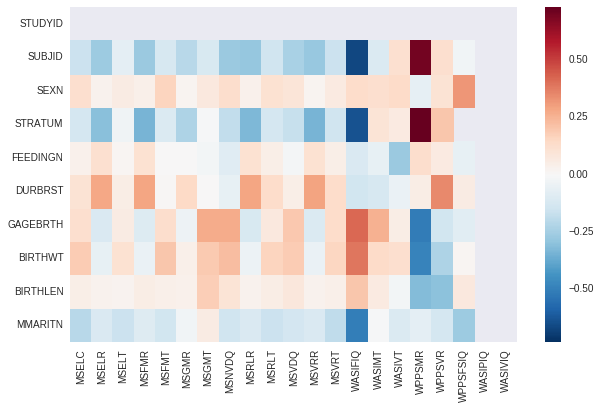

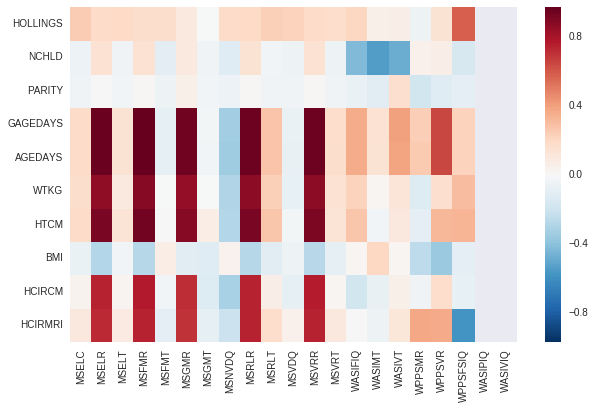

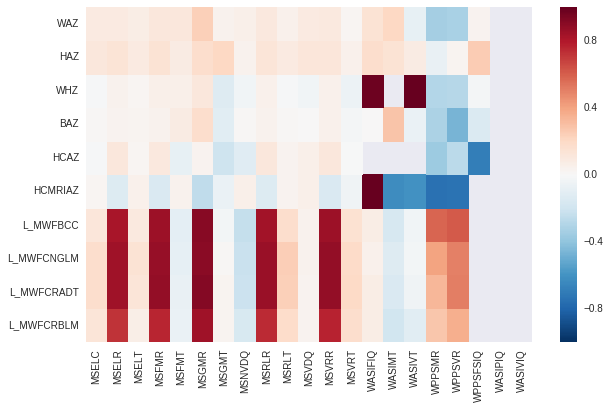

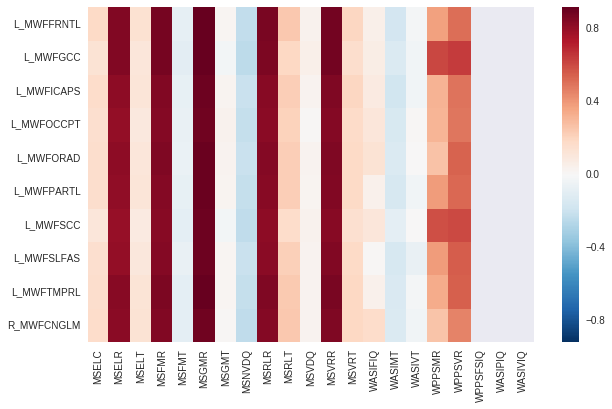

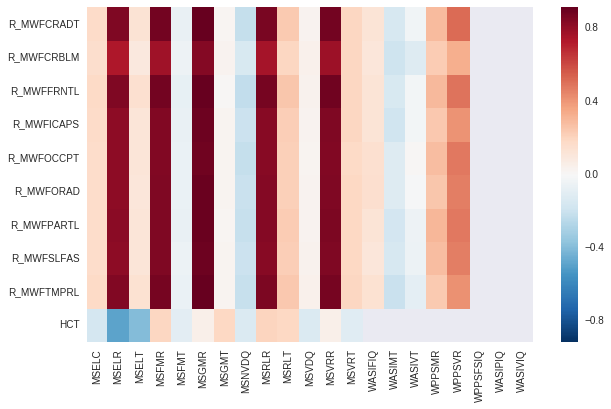

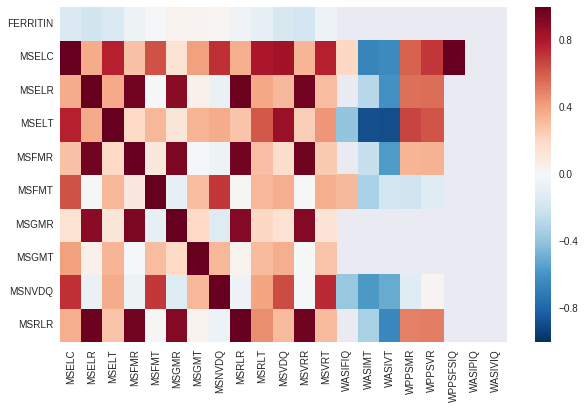

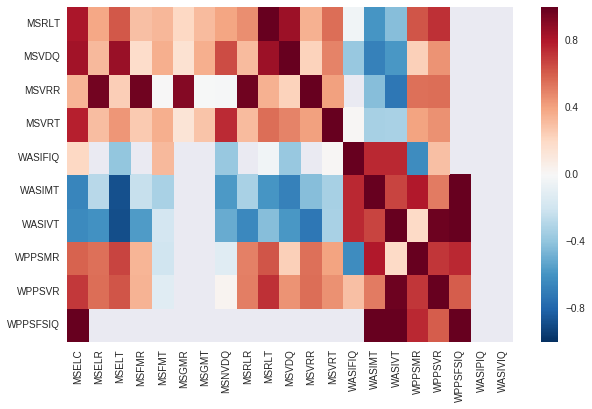

,MSELC,MSELR,MSELT,MSFMR,MSFMT,MSGMR,MSGMT,MSNVDQ,MSRLR,MSRLT,...,MSVRR,MSVRT,WASIFIQ,WASIMT,WASIVT,WPPSMR,WPPSVR,WPPSFSIQ,WASIPIQ,WASIVIQ
WASIPIQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WASIVIQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
y_corr = raw_train_data.corr()[y_columns]
for i in range(0, len(y_corr), 10):
  w = y_corr[i:i+10]
  try:
    hm = sns.heatmap(w)
    plt.show()
  except:
    display(w)

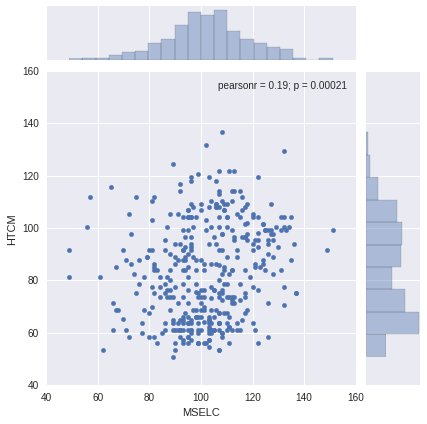

In [57]:
sns.jointplot('MSELC', 'HTCM', raw_train_data)

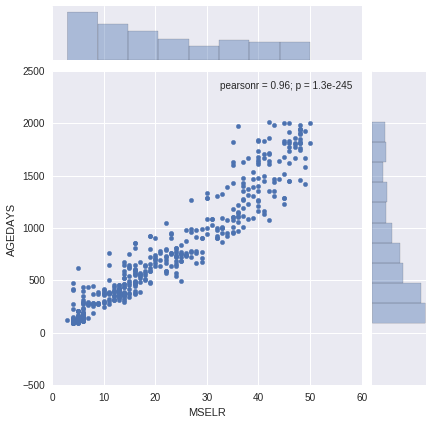

In [60]:
sns.jointplot('MSELR', 'AGEDAYS', raw_train_data)

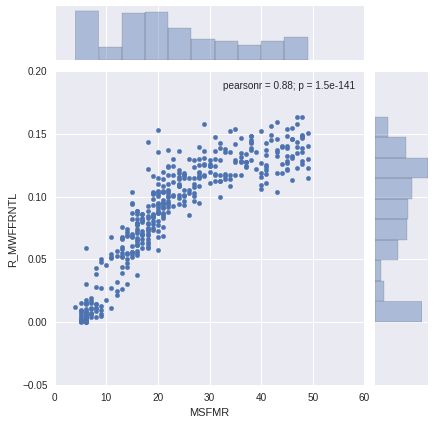

In [61]:
sns.jointplot('MSFMR', 'R_MWFFRNTL', raw_train_data)